# Critical Point $t_c$

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import glob

In [2]:
sns.set()

In [3]:
data_root = '../data/entropy-order-convolved/'
fig_root="../figures/"
# os.listdir(data_root)

In [4]:
M=2
classname="BA_NetworkPercolationExplosive_v7"
signature="{}_N_*_m_10_M_{}_entropy-order_*fast.txt".format(classname,M)

In [5]:
files=glob.glob(data_root + signature)

In [6]:
signature

'BA_NetworkPercolationExplosive_v7_N_*_m_10_M_2_entropy-order_*fast.txt'

In [7]:
files

['../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_800000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1200000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1000000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_400000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_600000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt']

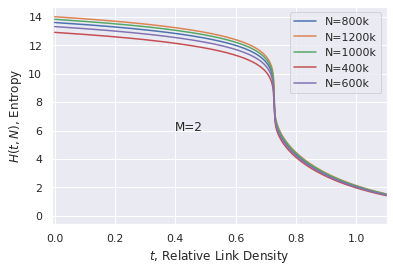

In [35]:
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        N=int(head['N'])
        M=int(head['M'])
        m=int(head['m'])
    X = np.loadtxt(file)
    index=np.linspace(1, X.shape[0]-2, 1000, dtype=int)
    plt.plot(X[:,0][index], X[:,1][index], label="N={}k".format(N//1000))
    pass
plt.legend()
plt.xlim([-0.01, 1.1])
plt.xlabel(r'$t$, Relative Link Density')
plt.ylabel(r'$H(t, N)$, Entropy')
plt.text(0.4, 6, "M={}".format(M))

filename=fig_root + classname + "entropy_m{}_M{}".format(m, M)
plt.savefig(filename)

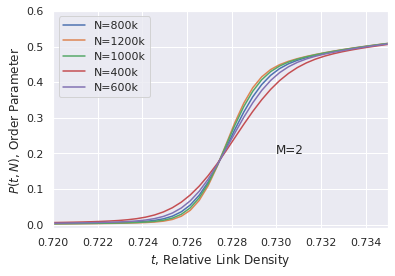

In [36]:
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        N=int(head['N'])
        M=int(head['M'])
        m=int(head['m'])
    X = np.loadtxt(file)
    index=np.linspace(1, X.shape[0]-2, 5000, dtype=int)
    plt.plot(X[:,0][index], X[:,2][index], label="N={}k".format(N//1000))
    pass
plt.legend()
plt.xlim([0.72, 0.735])
plt.ylim([-0.01, 0.6])
plt.xlabel(r'$t$, Relative Link Density')
plt.ylabel(r'$P(t, N)$, Order Parameter')

plt.text(0.73, 0.2, "M={}".format(M))
filename=fig_root + classname + "order-parameter_m{}_M{}".format(m, M)
plt.savefig(filename)

In [8]:
def find_specific_heat(t, H, N):
#     C = -t[1:]*np.diff(H)/np.diff(t)  # noisy data
    C = -t[1:]*np.diff(H)*N
    print(1/np.diff(t)[0])
    print(N)
    return C

def find_susceptibility(t, P, N):
    sus=np.diff(P)*N
    return sus

(1600000,)
(1599999,)
(2400000,)
(2399999,)
(2000000,)
(1999999,)
(800000,)
(799999,)
(1200000,)
(1199999,)


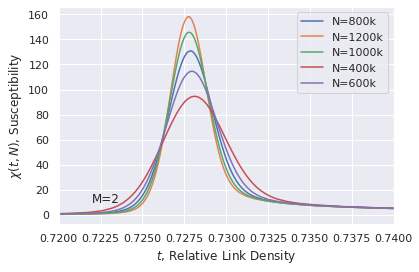

In [62]:
# tcs_susceptibility = []
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        N=int(head['N'])
        M=int(head['M'])
        m=int(head['m'])
    X = np.loadtxt(file)
    t=X[:,0]
    sus=find_susceptibility(t, X[:,2], N)
#     tcs_susceptibility.append([N, np.max(sus)])
    print(t.shape)
    index=(t[1:] > 0.72) & (t[1:] < 0.74)
    print(index.shape)
    plt.plot(t[1:][index], sus[index], label="N={}k".format(N//1000))
    pass
plt.legend()
plt.xlim([0.72, 0.74])
plt.xlabel(r'$t$, Relative Link Density')
plt.ylabel(r'$\chi(t, N)$, Susceptibility')
plt.text(0.722, 10, "M={}".format(M))
filename=fig_root + classname + "susceptibility_m{}_M{}".format(m, M)
# plt.savefig(filename)

In [9]:
def find_tc_susceptibility():
    """
    return : first column is the netowrk size,
        second column is the x coordinate critical point
        3rd column is the y coordinate critical point
    """
    tcs_susceptibility = []
    for file in files:
        with open(file) as f:
            line=f.readline()
            head=json.loads(line[1:])
            N=int(head['N'])
            M=int(head['M'])
            m=int(head['m'])
        X = np.loadtxt(file)
        t=X[:,0]
        sus=find_susceptibility(t, X[:,2], N)
        i=np.argmax(sus)
        tcs_susceptibility.append([N, t[i], np.max(sus)])
        
        pass
    return tcs_susceptibility

799999.9999999999
800000
1199994.7200232318
1200000
1000000.0
1000000
399999.99999999994
400000
600002.4000096001
600000


/home/shahnoor/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


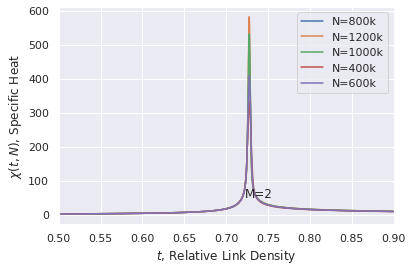

In [15]:
min_limit=0.3
max_milit=0.9

for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        N=int(head['N'])
        M=int(head['M'])
        m=int(head['m'])
    X = np.loadtxt(file)
    t=X[:,0]
    spec=find_specific_heat(t, X[:,1], N)
#     tcs_specific_heat.append([N, np.max(spec)])
    index=(t[1:] > min_limit) & (t[1:] < max_milit)
#     print(index.shape)
    plt.plot(t[1:][index], spec[index], label="N={}k".format(N//1000))
    pass
plt.legend()
plt.xlim([0.72, 0.74])
plt.xlim([0.5, 0.9])
plt.xlabel(r'$t$, Relative Link Density')
plt.ylabel(r'$\chi(t, N)$, Specific Heat')
plt.text(0.722, 50, "M={}".format(M))
filename=fig_root + classname + "specific-heat_m{}_M{}".format(m, M)
plt.savefig(filename)

In [75]:
def find_tc_specific_heat():
    """
    return : first column is the netowrk size,
        second column is the x coordinate critical point
        3rd column is the y coordinate critical point
    """
    tcs_specific_heat=[]
    for file in files:
        with open(file) as f:
            line=f.readline()
            head=json.loads(line[1:])
            N=int(head['N'])
            M=int(head['M'])
            m=int(head['m'])
        X = np.loadtxt(file)
        t=X[:,0]
        spec=find_specific_heat(t, X[:,1], N)
        i=np.argmax(spec)
        tcs_specific_heat.append([N, t[i], np.max(spec)])
        
        pass
    return tcs_specific_heat

In [89]:
# tcs_specific_heat = find_tc_specific_heat()
tcs_susceptibility = find_tc_susceptibility()

In [76]:
tcs_specific_heat

In [77]:
tcs_susceptibility

In [78]:
import scipy.stats as stats

In [91]:
def plot(data):
    data = np.array(data)
    plt.plot(np.log(data[:,0]), np.log(data[:,2]), 'o')
    regress = stats.linregress(np.log(data[:,0]), np.log(data[:,2]))
    print(regress)

LinregressResult(slope=0.5129950644916558, intercept=-0.8130122230655941, rvalue=0.999988013009125, pvalue=4.9819382312186024e-08, stderr=0.0014501954863424063)


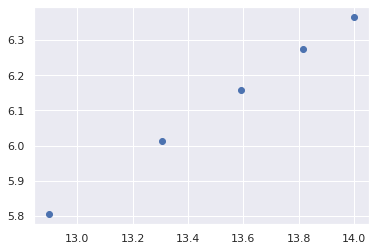

In [86]:
plot(tcs_specific_heat)

LinregressResult(slope=0.4682830896280964, intercept=-1.4904401204702538, rvalue=0.9999683178847599, pvalue=2.1406863878662742e-07, stderr=0.0021521882198504735)


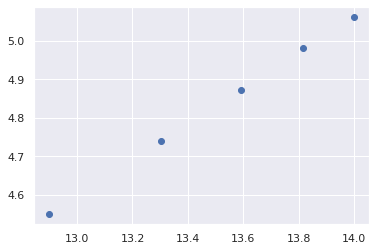

In [92]:
plot(tcs_susceptibility)